In [1]:
#Import the Library
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
%matplotlib inline

In [2]:
#Import the Dataset
df_airline=pd.read_csv('Data/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
#Auto Regressive value found by PACF method
#Moving Average value found by ACF method
#Integreated value we take diff
#we try to find all these values

In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0, inplace=True)

In [7]:
df_airline.isnull().sum()


Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
#The datatype of month is object we want this column in datetime format

In [10]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
df_airline.set_index("Month", inplace=True)

In [14]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

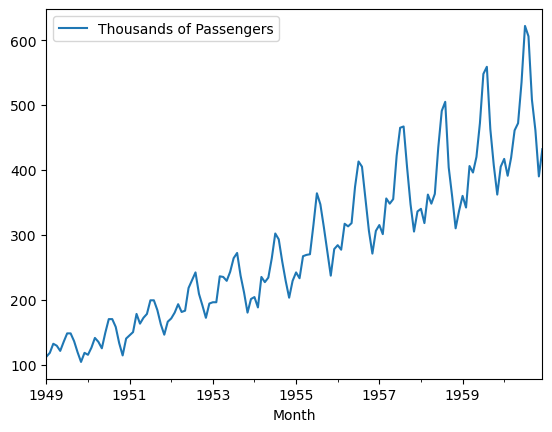

In [15]:
df_airline.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics : {}".format(result[0]))
    print("p-value : {}".format(result[1]))
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating itn is non-stationary")

In [18]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics : 0.8153688792060597
p-value : 0.9918802434376411
Weak evidence against null hypothesis, time series has a unit root, indicating itn is non-stationary


In [19]:
#Use Techniques Differencing
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics : -2.829266824169992
p-value : 0.0542132902838265
Weak evidence against null hypothesis, time series has a unit root, indicating itn is non-stationary


In [22]:
df_airline['Passengers Second Difference'] = df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [23]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [24]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics : -16.384231542468527
p-value : 2.732891850014085e-29
Strong evidence against the null hypothesis, reject the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
#Lets check for seasonal of 12 months also called the SARIMA, somtimes the ARIMA not worl well the  we do the SARIMA

In [26]:
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [27]:
adf_test(df_airline['Passengers 12 Difference'].dropna())
#if we have the seasonal data then we apply the 12 month shift 

ADF Statistics : -3.3830207264924805
p-value : 0.011551493085514982
Strong evidence against the null hypothesis, reject the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [28]:
#Here the p-value is less then the significant value so the data is stationary

<Axes: xlabel='Month'>

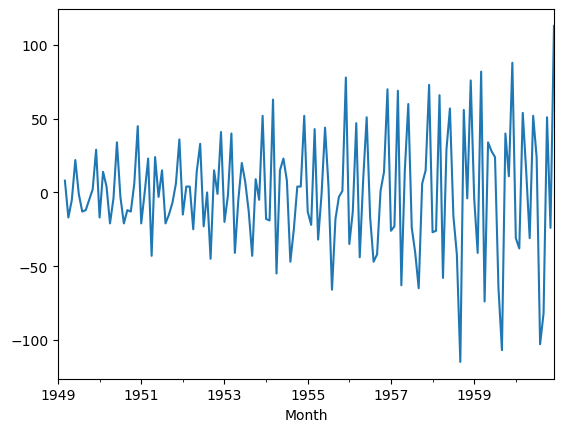

In [29]:
df_airline['Passengers Second Difference'].plot()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

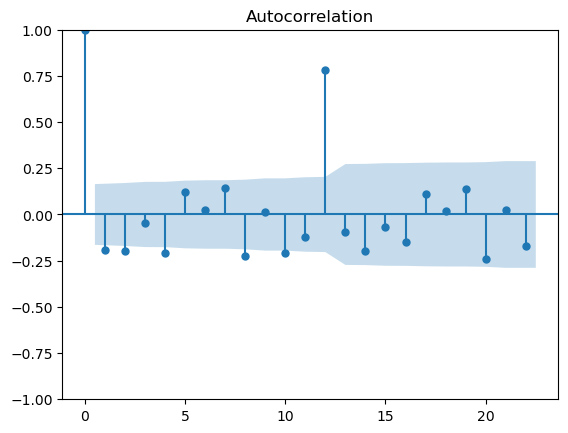

In [31]:
acf = plot_acf(df_airline['Passengers Second Difference'].dropna())

In [32]:
#12th data having the high impact

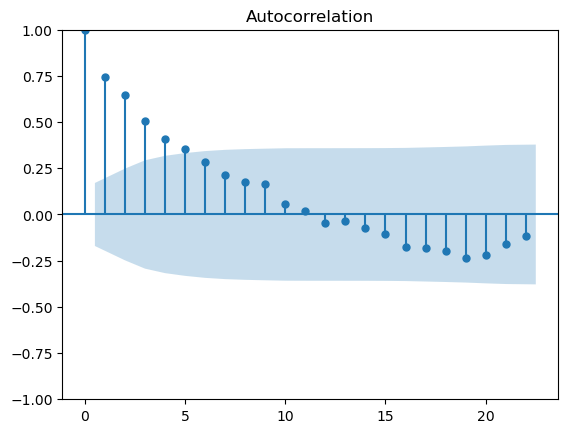

In [33]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())

In [34]:
#in the above the Q=5 do not include the 0 value so the total 5 value is greater then Upper bond 

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


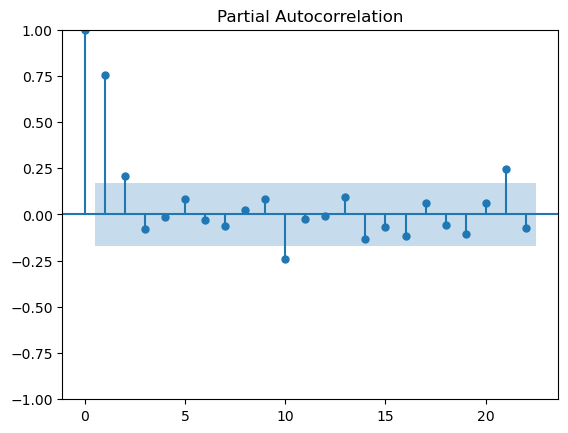

In [35]:
result12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())

In [36]:
#Here our P=2 we create our model by taking the p=2 if it not works fine then go with P=10fro

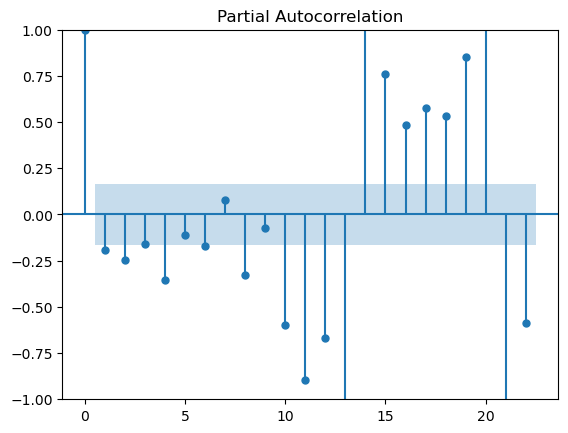

In [37]:
result =  plot_pacf(df_airline['Passengers Second Difference'].dropna())

In [38]:
#10th point have high impact in the graph above graph

In [39]:
## Split train and test dataa
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [40]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [41]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [42]:
##Prediction
pred_start_data = test_data.index[0]
pred_end_date = test_data.index[-1]

In [43]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [44]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [45]:
#Create a ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
#This is seasonal data so not working with the ARIMA model we use the SARIMA model
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(4,2,3))

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
#P=10, d=2, Q=0 in the order(), here we take the AR model right now, if we take Q=12 then go with seasonal model

In [48]:
model_ARIMA_fit = model_ARIMA.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(4, 2, 3)   Log Likelihood                -355.974
Date:                     Fri, 01 Dec 2023   AIC                            727.949
Time:                             17:32:02   BIC                            747.202
Sample:                         01-01-1949   HQIC                           735.679
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3328      0.134     -2.489      0.013      -0.595      -0.071
ar.L2         -0.8534      0.134     -6.369      0.000      -1.116      -0.591
ar.L3          0.1164      0.135      0.865      0.387      -0.147       0.380
ar.L4         -0.4246      0.134     -3.166      0.002      -0.687      -0.162
ma.L1         -0.2989     35.635     -0.008      0.993     -70.143      69.545
ma.L2          0.2860     24.980      0.011      0.991     -48.674      49.246
ma.L3         -0.9869     35.234     -0.028      0.978     -70.044      68.070
sigma2       306.4402   1.09e+04      0.028      0.978   -2.11e+04    2.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.60   Prob(JB):                         0.77
Heteroskedasticity (H):               3.64   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#The P value is less the 0.005 it means all the 10 lags which we take have the good positive impact on the current time stamp data
#

In [51]:
##prediction
pred_start_date = test_data.index[0]
pred_end_data = test_data.index[-1]
print(pred_start_data)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [52]:
predar = model_ARIMA_fit.predict(start=pred_start_data, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-predar

In [53]:
residuals

Month
1956-01-01    -18.954387
1956-02-01    -16.281619
1956-03-01     16.108775
1956-04-01     15.684653
1956-05-01     32.506881
1956-06-01     71.324921
1956-07-01    104.397482
1956-08-01    107.688305
1956-09-01     46.766037
1956-10-01     -6.833429
1956-11-01    -32.353572
1956-12-01     -7.851939
1957-01-01     -4.550047
1957-02-01     -9.841060
1957-03-01     36.672933
1957-04-01     22.655116
1957-05-01     37.129830
1957-06-01     96.889023
1957-07-01    133.618544
1957-08-01    142.106689
1957-09-01     73.078851
1957-10-01      9.688567
1957-11-01    -26.826181
1957-12-01     -0.857922
1958-01-01     -3.252754
1958-02-01    -20.681980
1958-03-01     19.136270
1958-04-01     -1.184444
1958-05-01     17.531722
1958-06-01     86.058354
1958-07-01    135.878981
1958-08-01    152.812591
1958-09-01     48.924350
1958-10-01     -2.066203
1958-11-01    -48.845914
1958-12-01    -24.257531
1959-01-01     -7.024383
1959-02-01    -23.448521
1959-03-01     38.521763
1959-04-01     23.0

<Axes: xlabel='Month'>

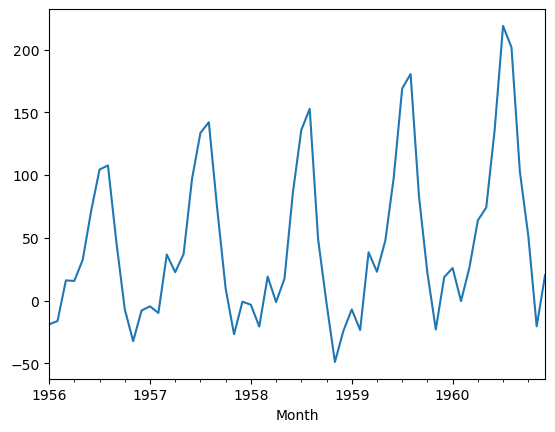

In [54]:
residuals.plot()

<Axes: ylabel='Density'>

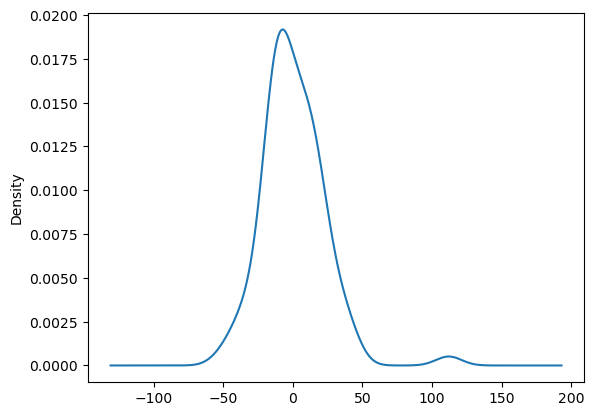

In [55]:
model_ARIMA_fit.resid.plot(kind
                           ='kde')

In [56]:
#It look like normal distributes graph, it means we are moving in the right direction
#we put the predicted values in the new coloumn name Predicted arima

In [57]:
test_data['Predicted_ARIMA']=predar

C:\Users\415vi\AppData\Local\Temp\ipykernel_5348\3803576001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=predar


<Axes: xlabel='Month'>

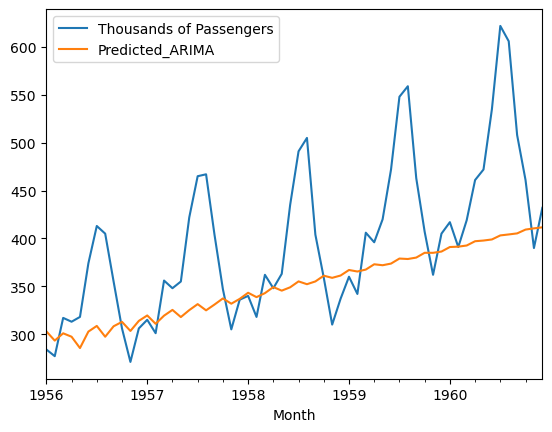

In [58]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

In [76]:
#Lets find for the forcast values metrices for SARIMA
mae_forcast = mean_absolute_error( test_data['Thousands of Passengers'],predar)
rmse_forecast = mean_squared_error( test_data['Thousands of Passengers'],predar)**0.5
mape_forecast = mean_absolute_percentage_error( test_data['Thousands of Passengers'],predar)

print("TES-MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_forcast,rmse_forecast,mape_forecast))

TES-MAE:55.146, RMSE:77.664, MAPE:0.123


In [59]:
# This is seasonal data so not working with the ARIMA model we use the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


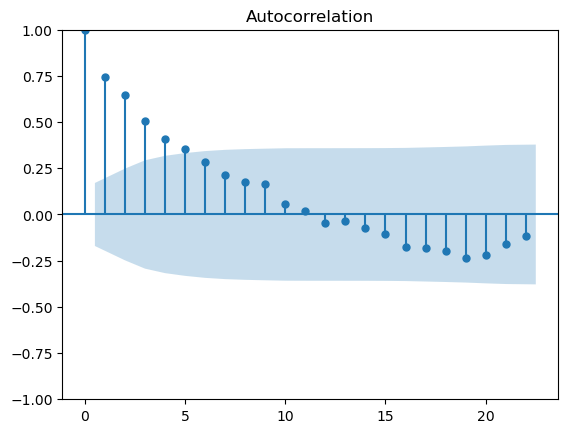

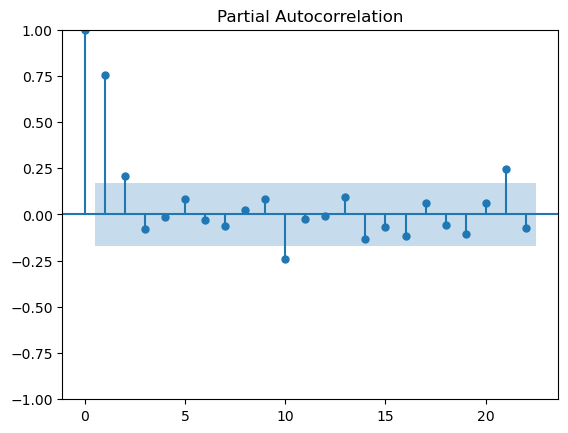

In [60]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())
result12 = plot_pacf(df_airline['Passengers 12 Difference'].dropna())

In [61]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
model_SARIMAX_fit = model_SARIMAX.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 01 Dec 2023   AIC                            548.481
Time:                                     17:32:04   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.937      0.638      0.523      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.164      0.158      0.874      -2.097       2.465
ma.L2         -0.5340      1.262     -0.423      0.672      -3.007       1.939
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7334     81.111      1.082      0.279     -71.240     246.707
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
##prediction
pred_start_date = test_data.index[0]
pred_end_data = test_data.index[-1]
print(pred_start_data)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [65]:
predsar = model_SARIMAX_fit.predict(start=pred_start_data, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-predsar

<Axes: xlabel='Month'>

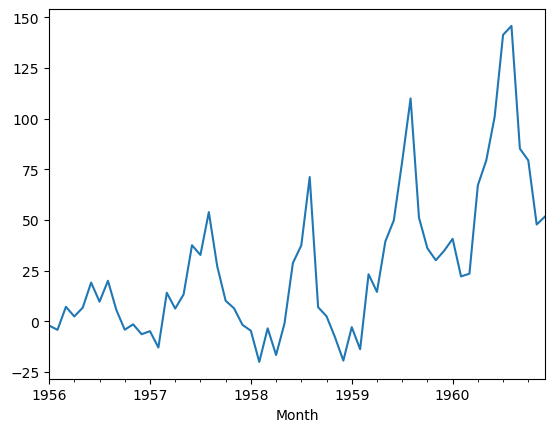

In [66]:
residuals.plot()

<Axes: ylabel='Density'>

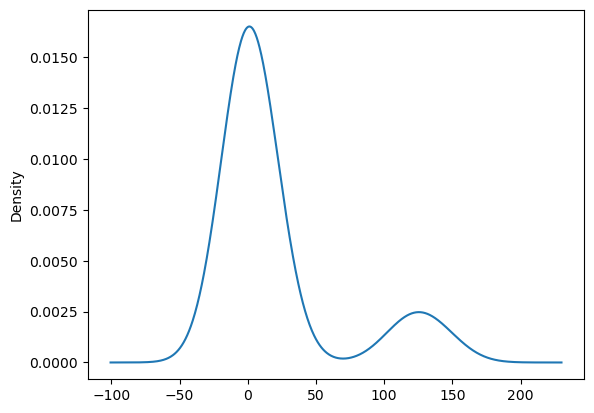

In [67]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [68]:
test_data['Predicted_SARIMAX']=predsar

C:\Users\415vi\AppData\Local\Temp\ipykernel_5348\1495385804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX']=predsar


<Axes: xlabel='Month'>

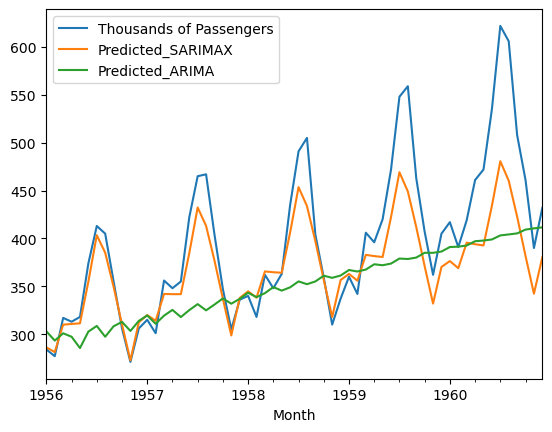

In [69]:
test_data[['Thousands of Passengers', 'Predicted_SARIMAX','Predicted_ARIMA']].plot()

In [74]:
#Lets find for the forcast values metrices for SARIMA
mae_forcast = mean_absolute_error( test_data['Thousands of Passengers'],predsar)
rmse_forecast = mean_squared_error( test_data['Thousands of Passengers'],predsar)**0.5
mape_forecast = mean_absolute_percentage_error( test_data['Thousands of Passengers'],predsar)

print("TES-MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_forcast,rmse_forecast,mape_forecast))

TES-MAE:31.639, RMSE:46.380, MAPE:0.069
